# ❓ <font color='green'> <u> PROBLEM STATEMENT (Naive Bayes) </u>
    
## 🔵 Prepare a classification model using Naive Bayes for salary data 

* ### ➡ Data Description:
    + age -- age of a person
    + workclass	-- A work class is a grouping of work 
    + education	-- Education of an individuals	
    + maritalstatus -- Marital status of an individulas	
    + occupation	 -- occupation of an individuals
    + relationship -- 	
    + race --  Race of an Individual
    + sex --  Gender of an Individual
    + capitalgain --  profit received from the sale of an investment
    + capitalloss	-- A decrease in the value of a capital asset
    + hoursperweek -- number of hours work per week	
    + native -- Native of an individual
    + Salary -- salary of an individual

### ⚫ <u>Introduction:

<b><u> Naive Bayes</u></b> is a classification technique that <b><u>uses Bayes' Theorem and probability theory</u> </b>to predict the tag of a text. It's a simple technique for constructing classifiers, which are models that assign class labels to problem instances.

___

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style= 'darkgrid', palette= 'pastel')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB as CNB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

___

* ### <font color = 'blue'> <u> READ DATA </u>

In [1]:
# Importing Training Dataset:

salary_train = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Data_sets/main/SalaryData_Train.csv')
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
salary_train.shape

(30161, 14)

In [3]:
# Importing Testing Dataset
salary_test = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Data_sets/main/SalaryData_Test.csv')
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
salary_test.shape

(15060, 14)

In [5]:
# Merging Train and Test Data
df = salary_train.append(salary_test)
df.reset_index(inplace=True)
df.drop(['index'],inplace=True,axis = 1)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


___

* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <font color ='green'> <u>Data Summary</u>

In [6]:
df.shape

(45221, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


* ##### <font color ='green'> <u>Descriptive statistics</u>

In [8]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Checking For null Value if any:

df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

> * #### There are 45221 records and 14 Variables.
> * #### All variables are in proper data type, majority of them are object data type.
> * #### "Salary" is target column.
> * #### No null value observed.
> * #### We don't have specific primary key like "id", so we assume that there is no duplicated record.

___

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

<Axes: >

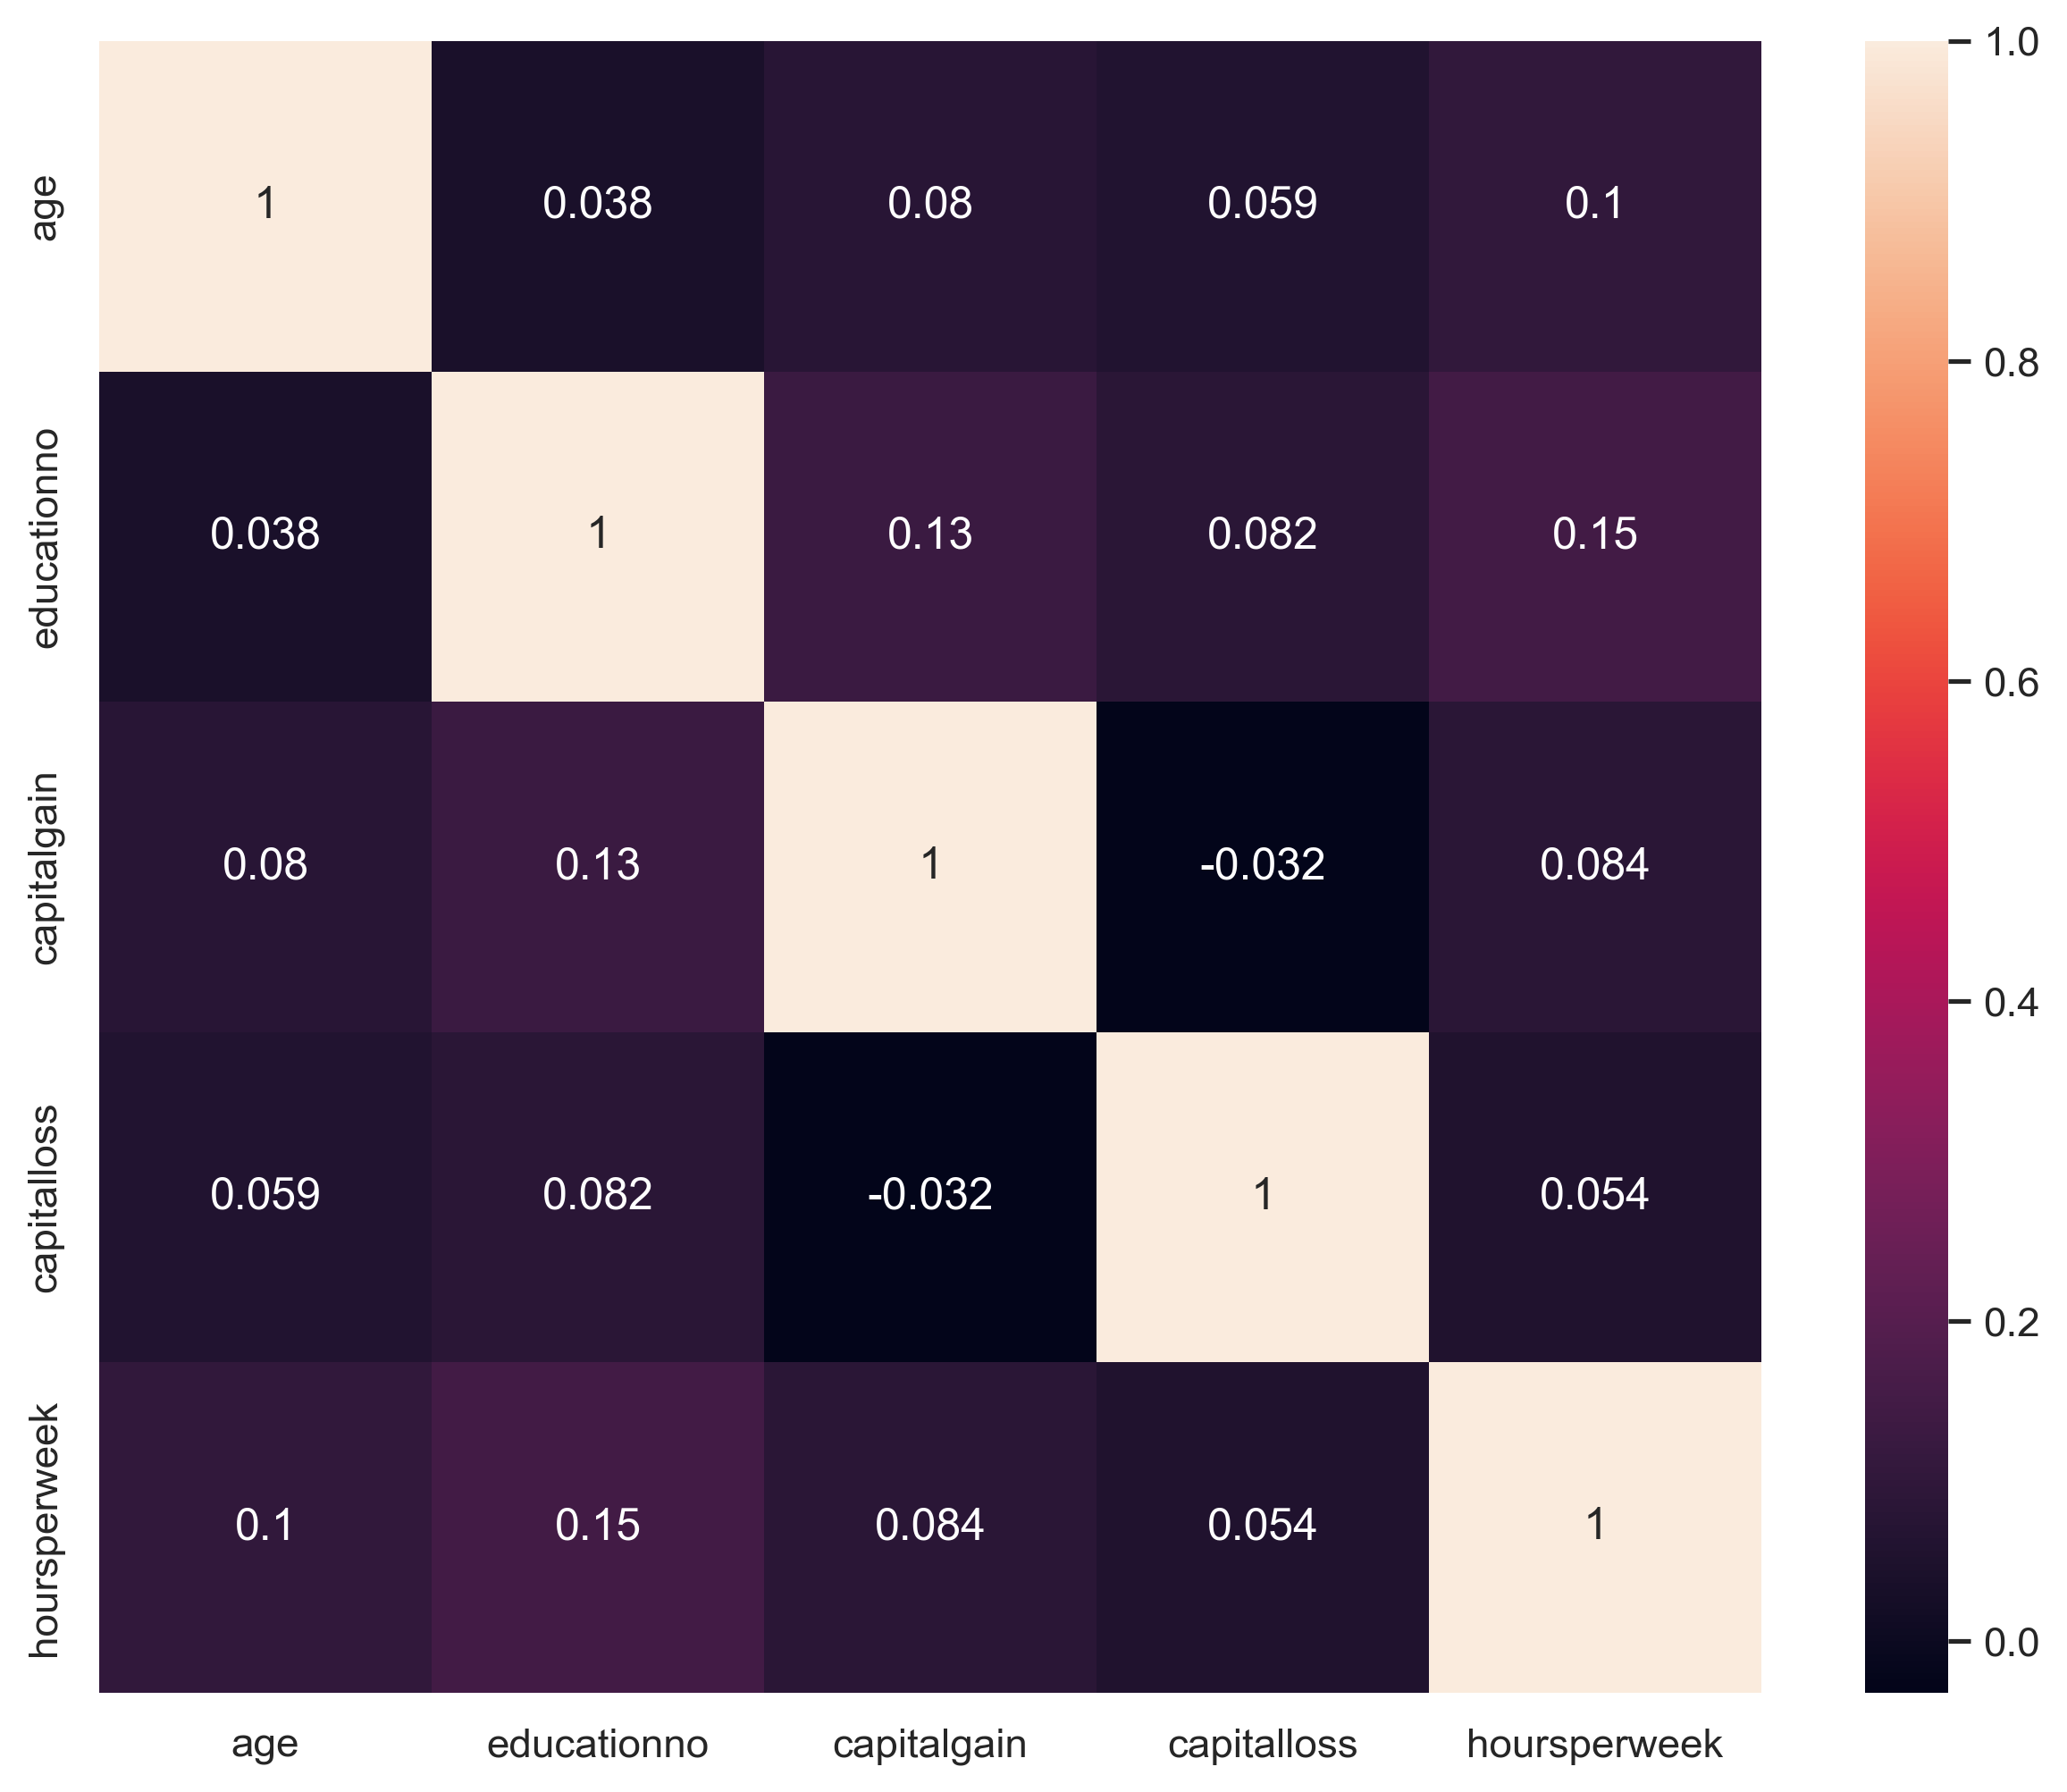

In [10]:
# Correation between Numerical variables:
sns.heatmap(df.corr(), annot = True)

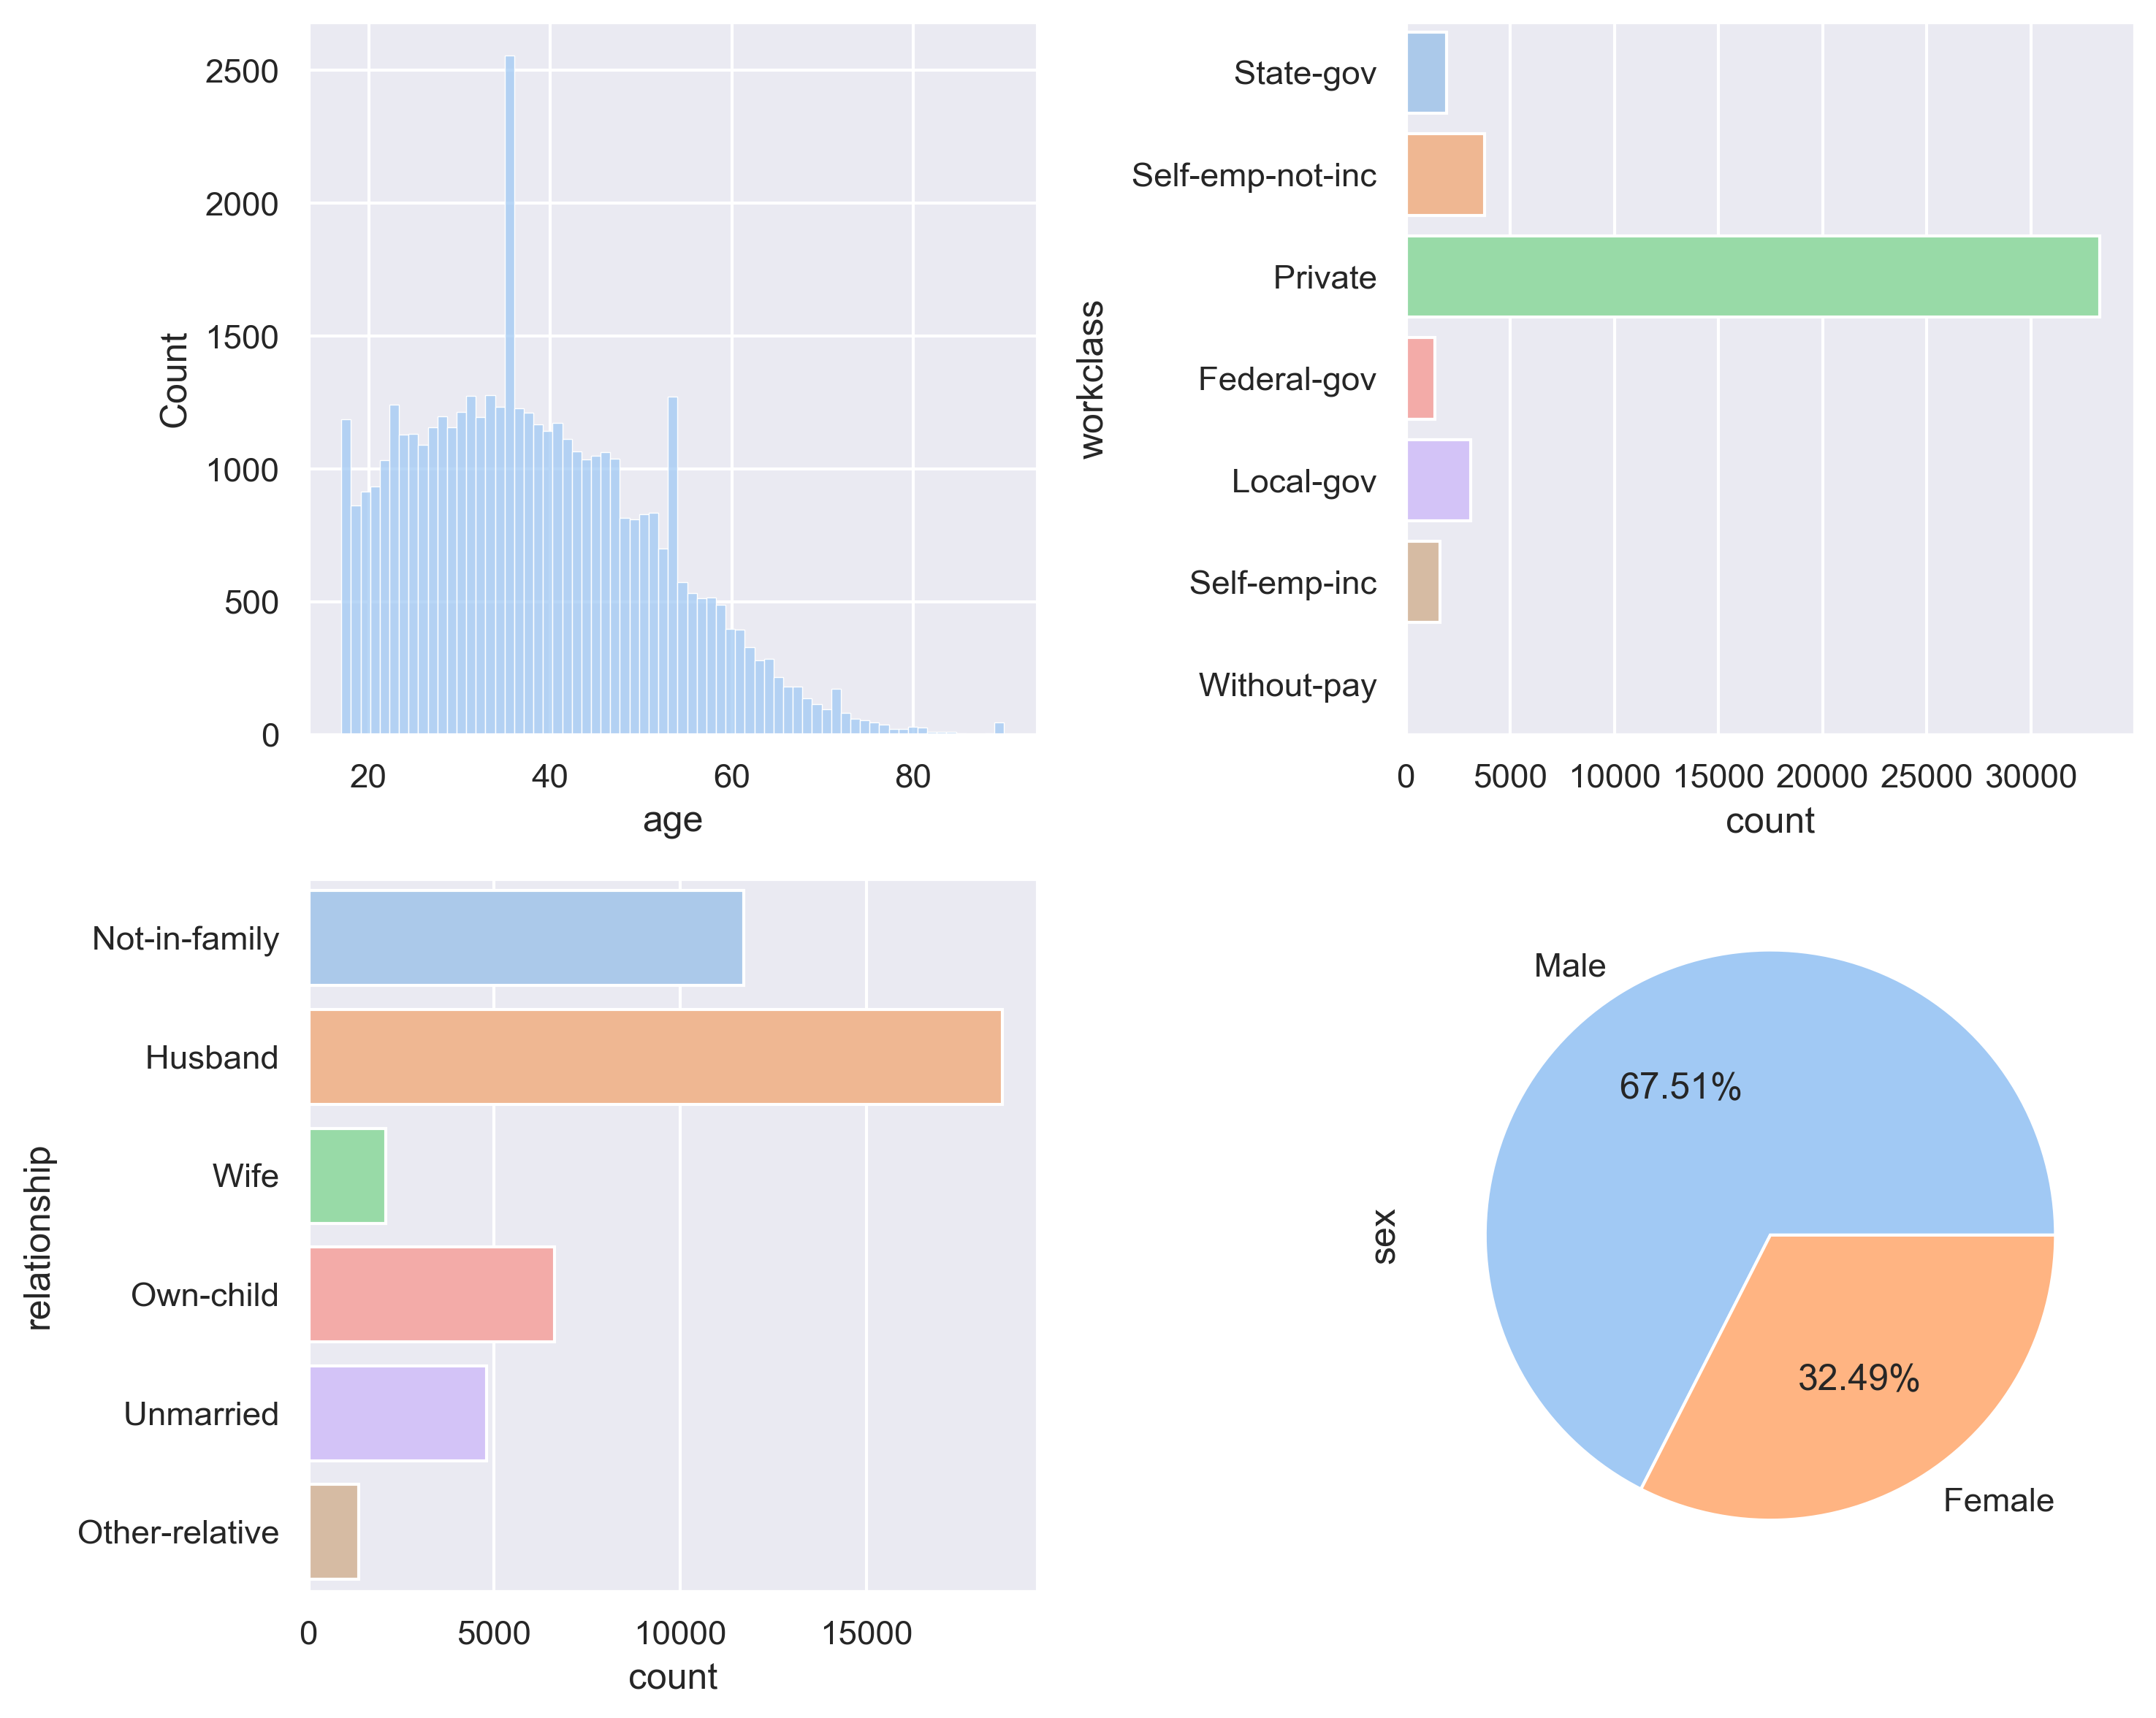

In [11]:
fig,index = plt.subplots(2,2)

sns.histplot(df['age'],ax = index[0,0])
sns.countplot(y = df['workclass'], ax = index[0,1])
sns.countplot(y = df['relationship'], ax = index[1,0])
df['sex'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', ax = index[1,1])
plt.tight_layout()

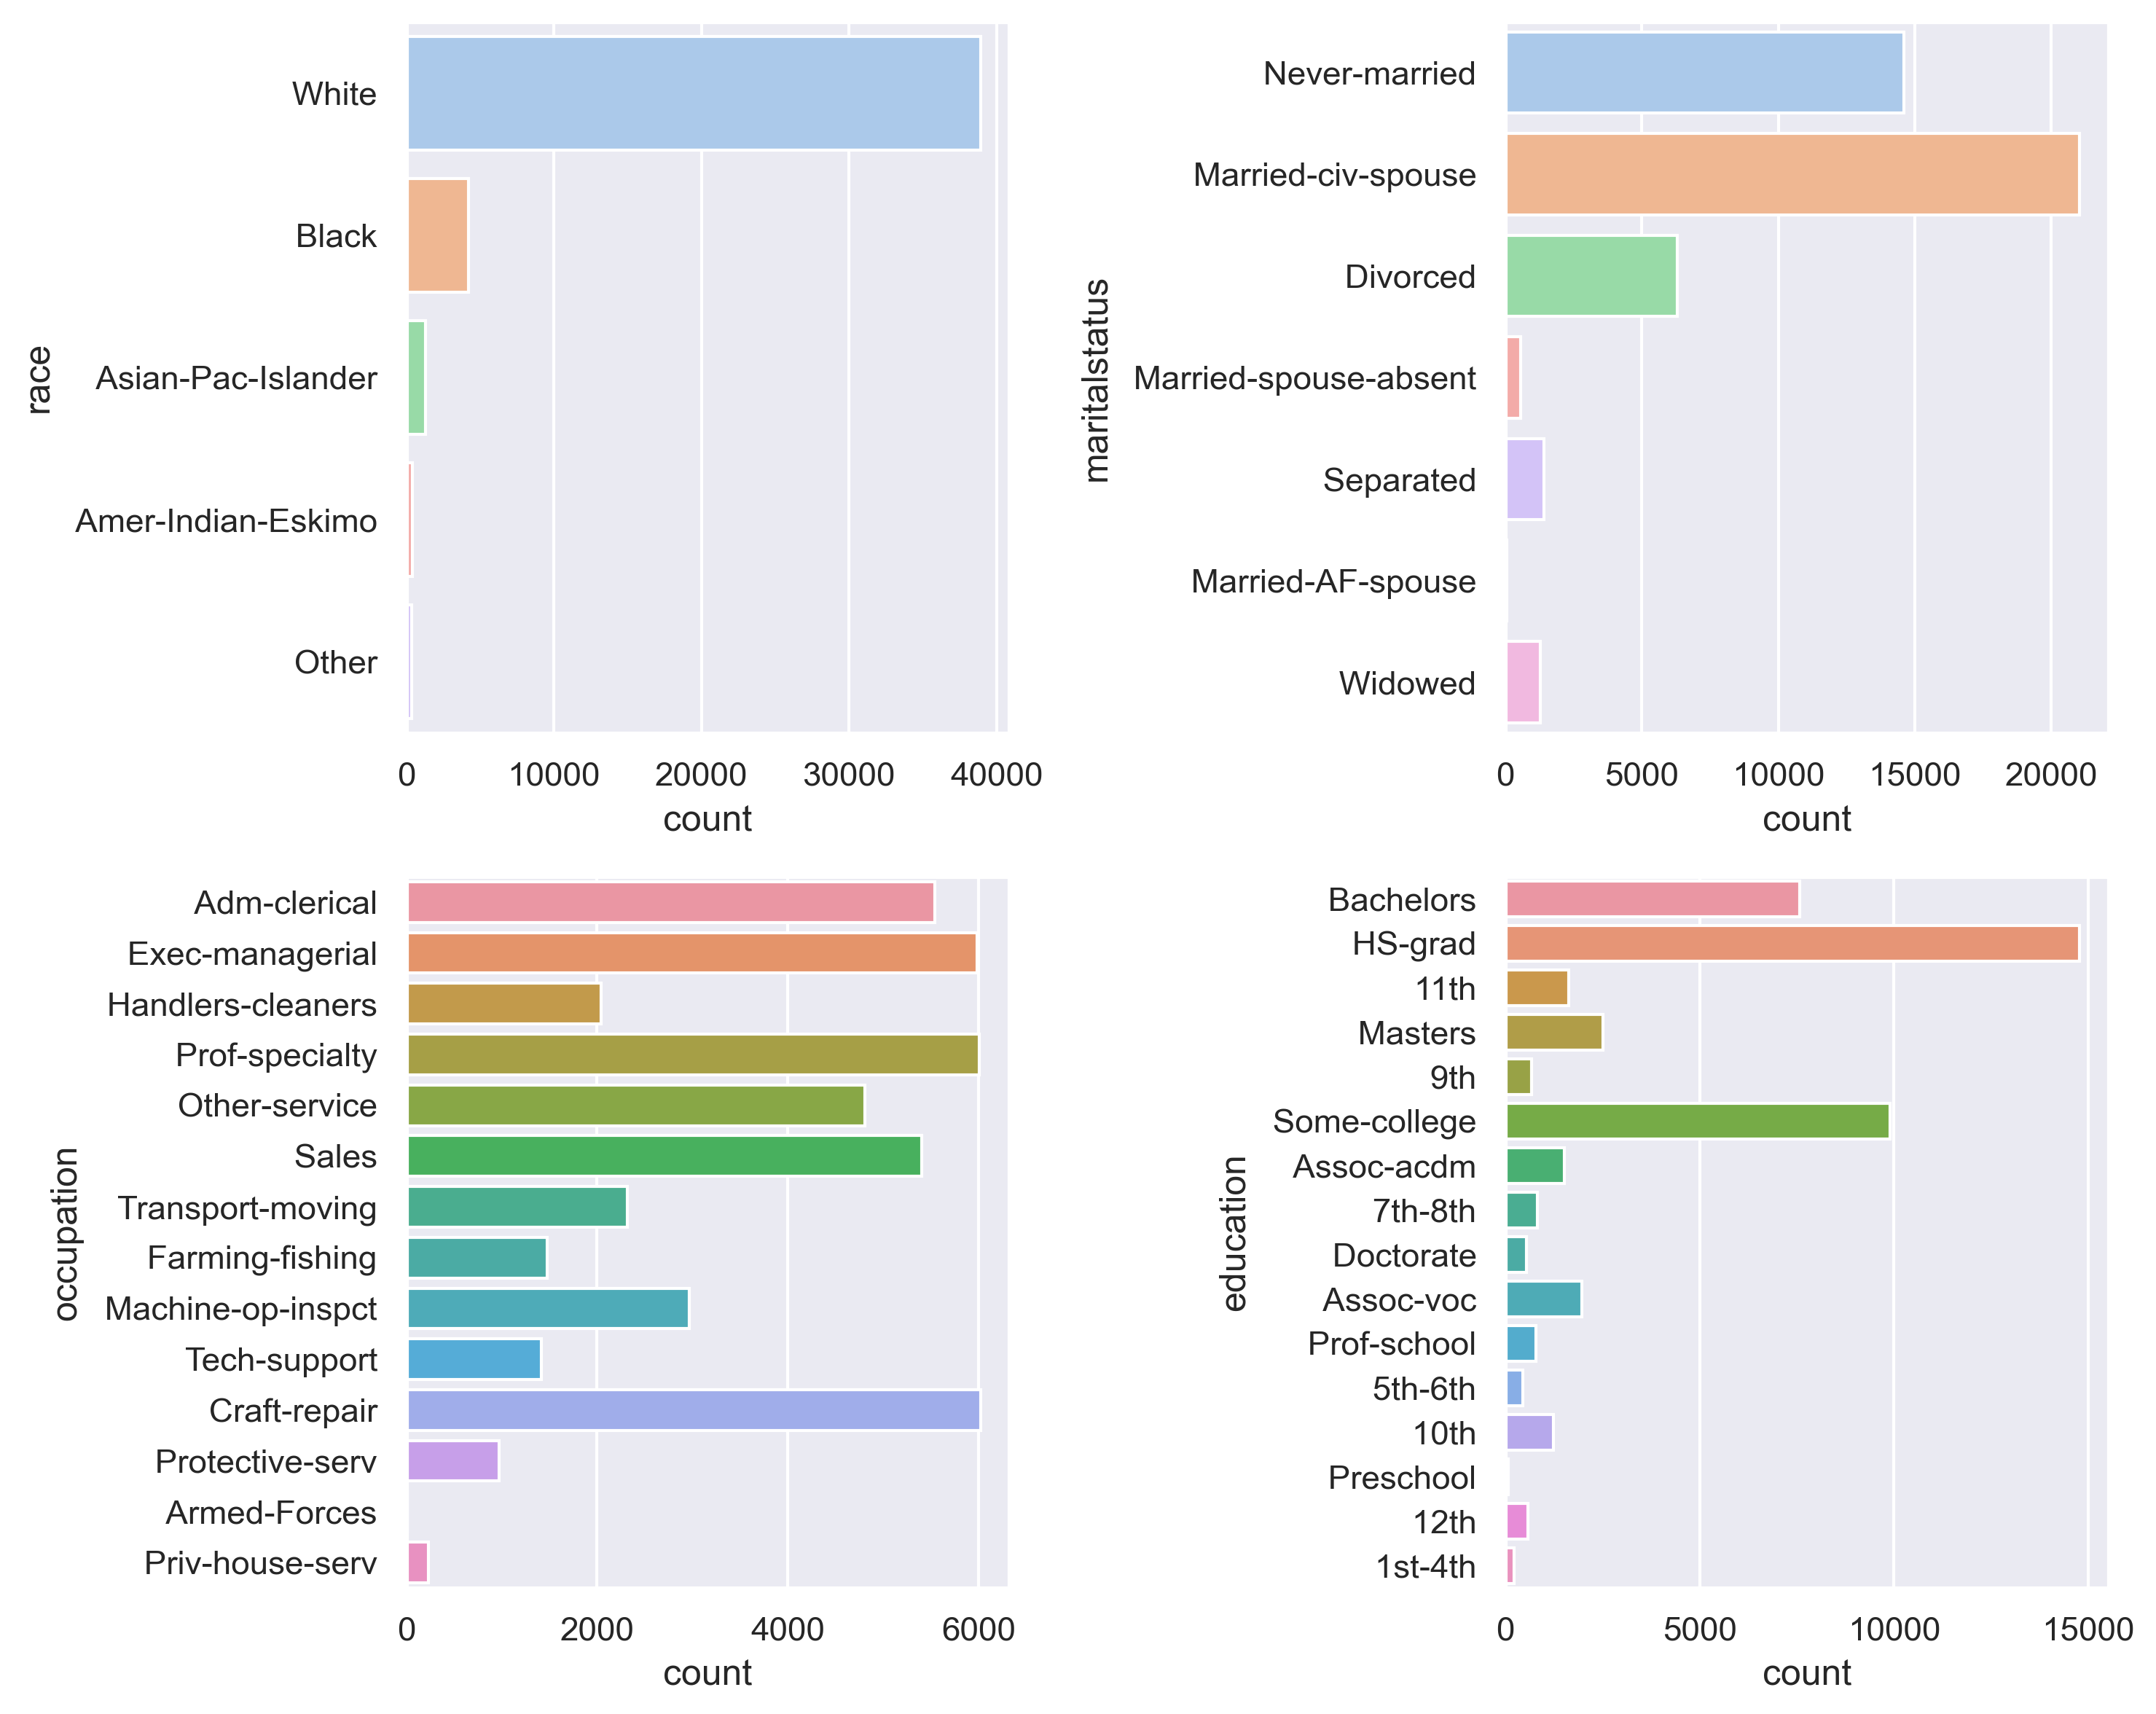

In [12]:
fig,index = plt.subplots(2,2)

sns.countplot(y = df['race'], ax = index[0,0])
sns.countplot(y = df['maritalstatus'], ax = index[0,1])
sns.countplot(y = df['occupation'], ax = index[1,0])
sns.countplot(y = df['education'], ax = index[1,1])
plt.tight_layout()

Text(0.5, 1.0, 'Barplot for Native')

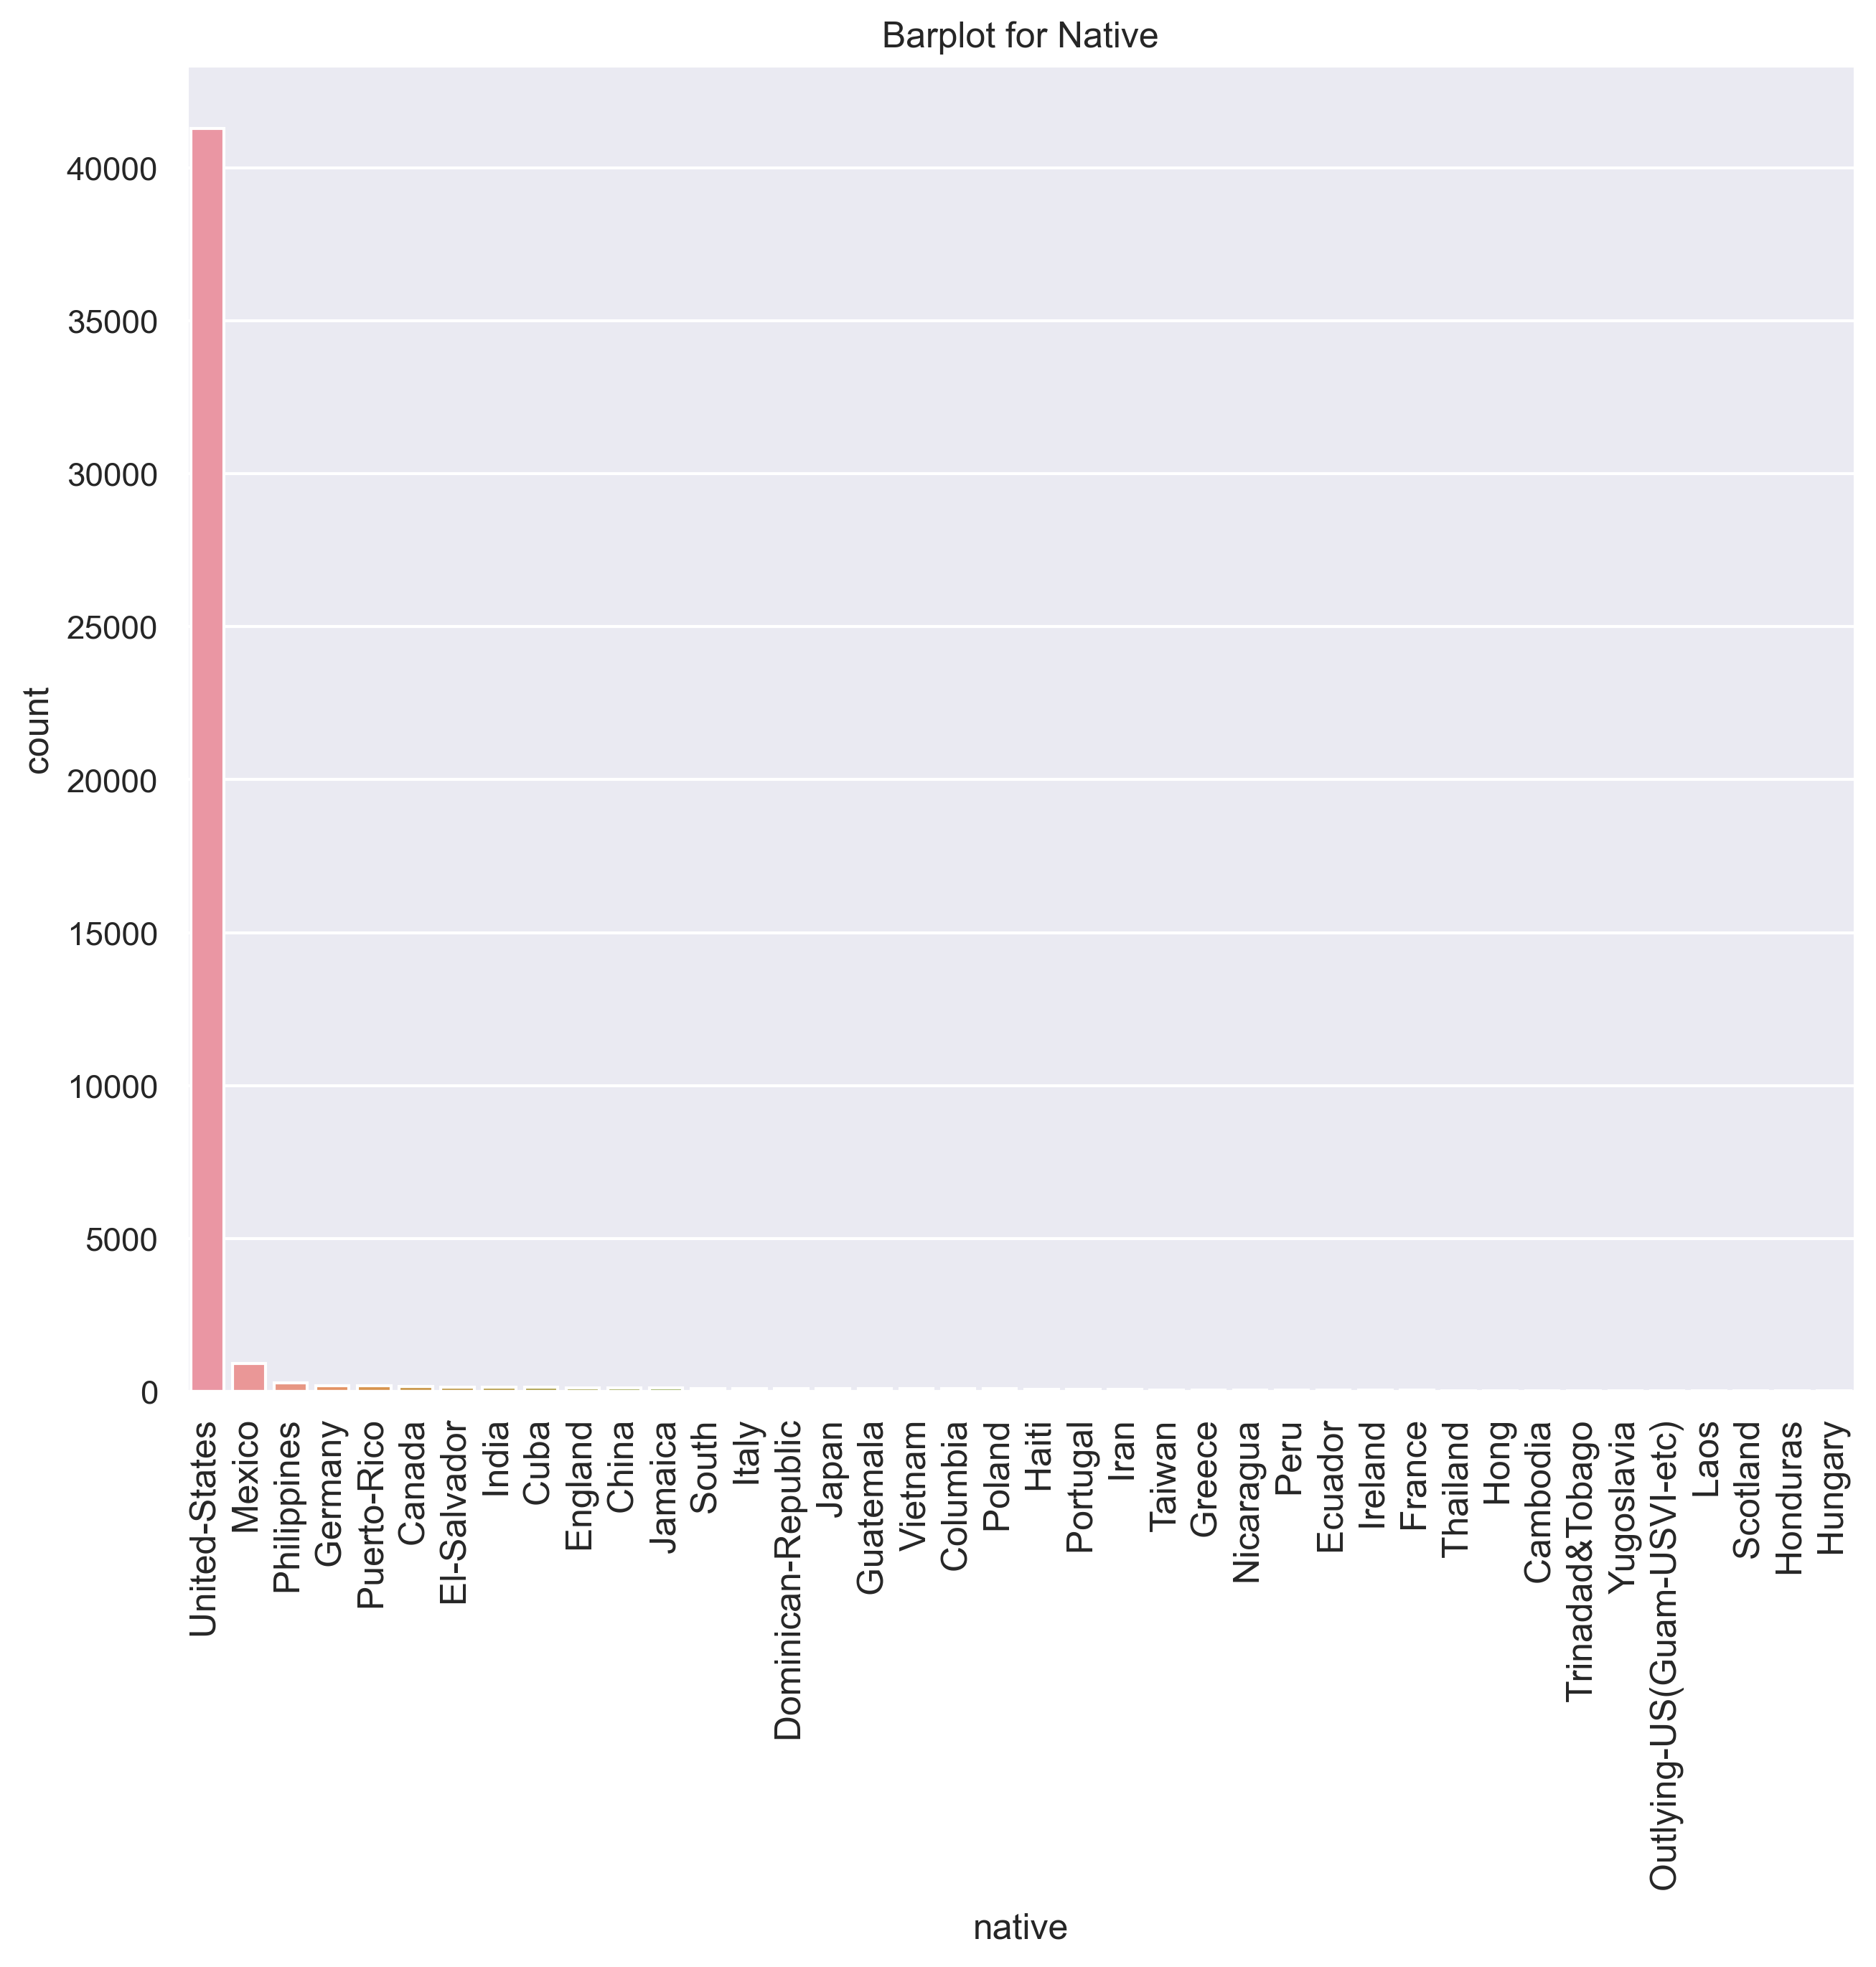

In [13]:
sns.countplot(x = df['native'], order= df['native'].value_counts().index)
plt.xticks(fontsize = 12 ,rotation= 90)
plt.title('Barplot for Native')

hoursperweek       Axes(0.125,0.11;0.227941x0.77)
capitalgain     Axes(0.398529,0.11;0.227941x0.77)
capitalloss     Axes(0.672059,0.11;0.227941x0.77)
dtype: object

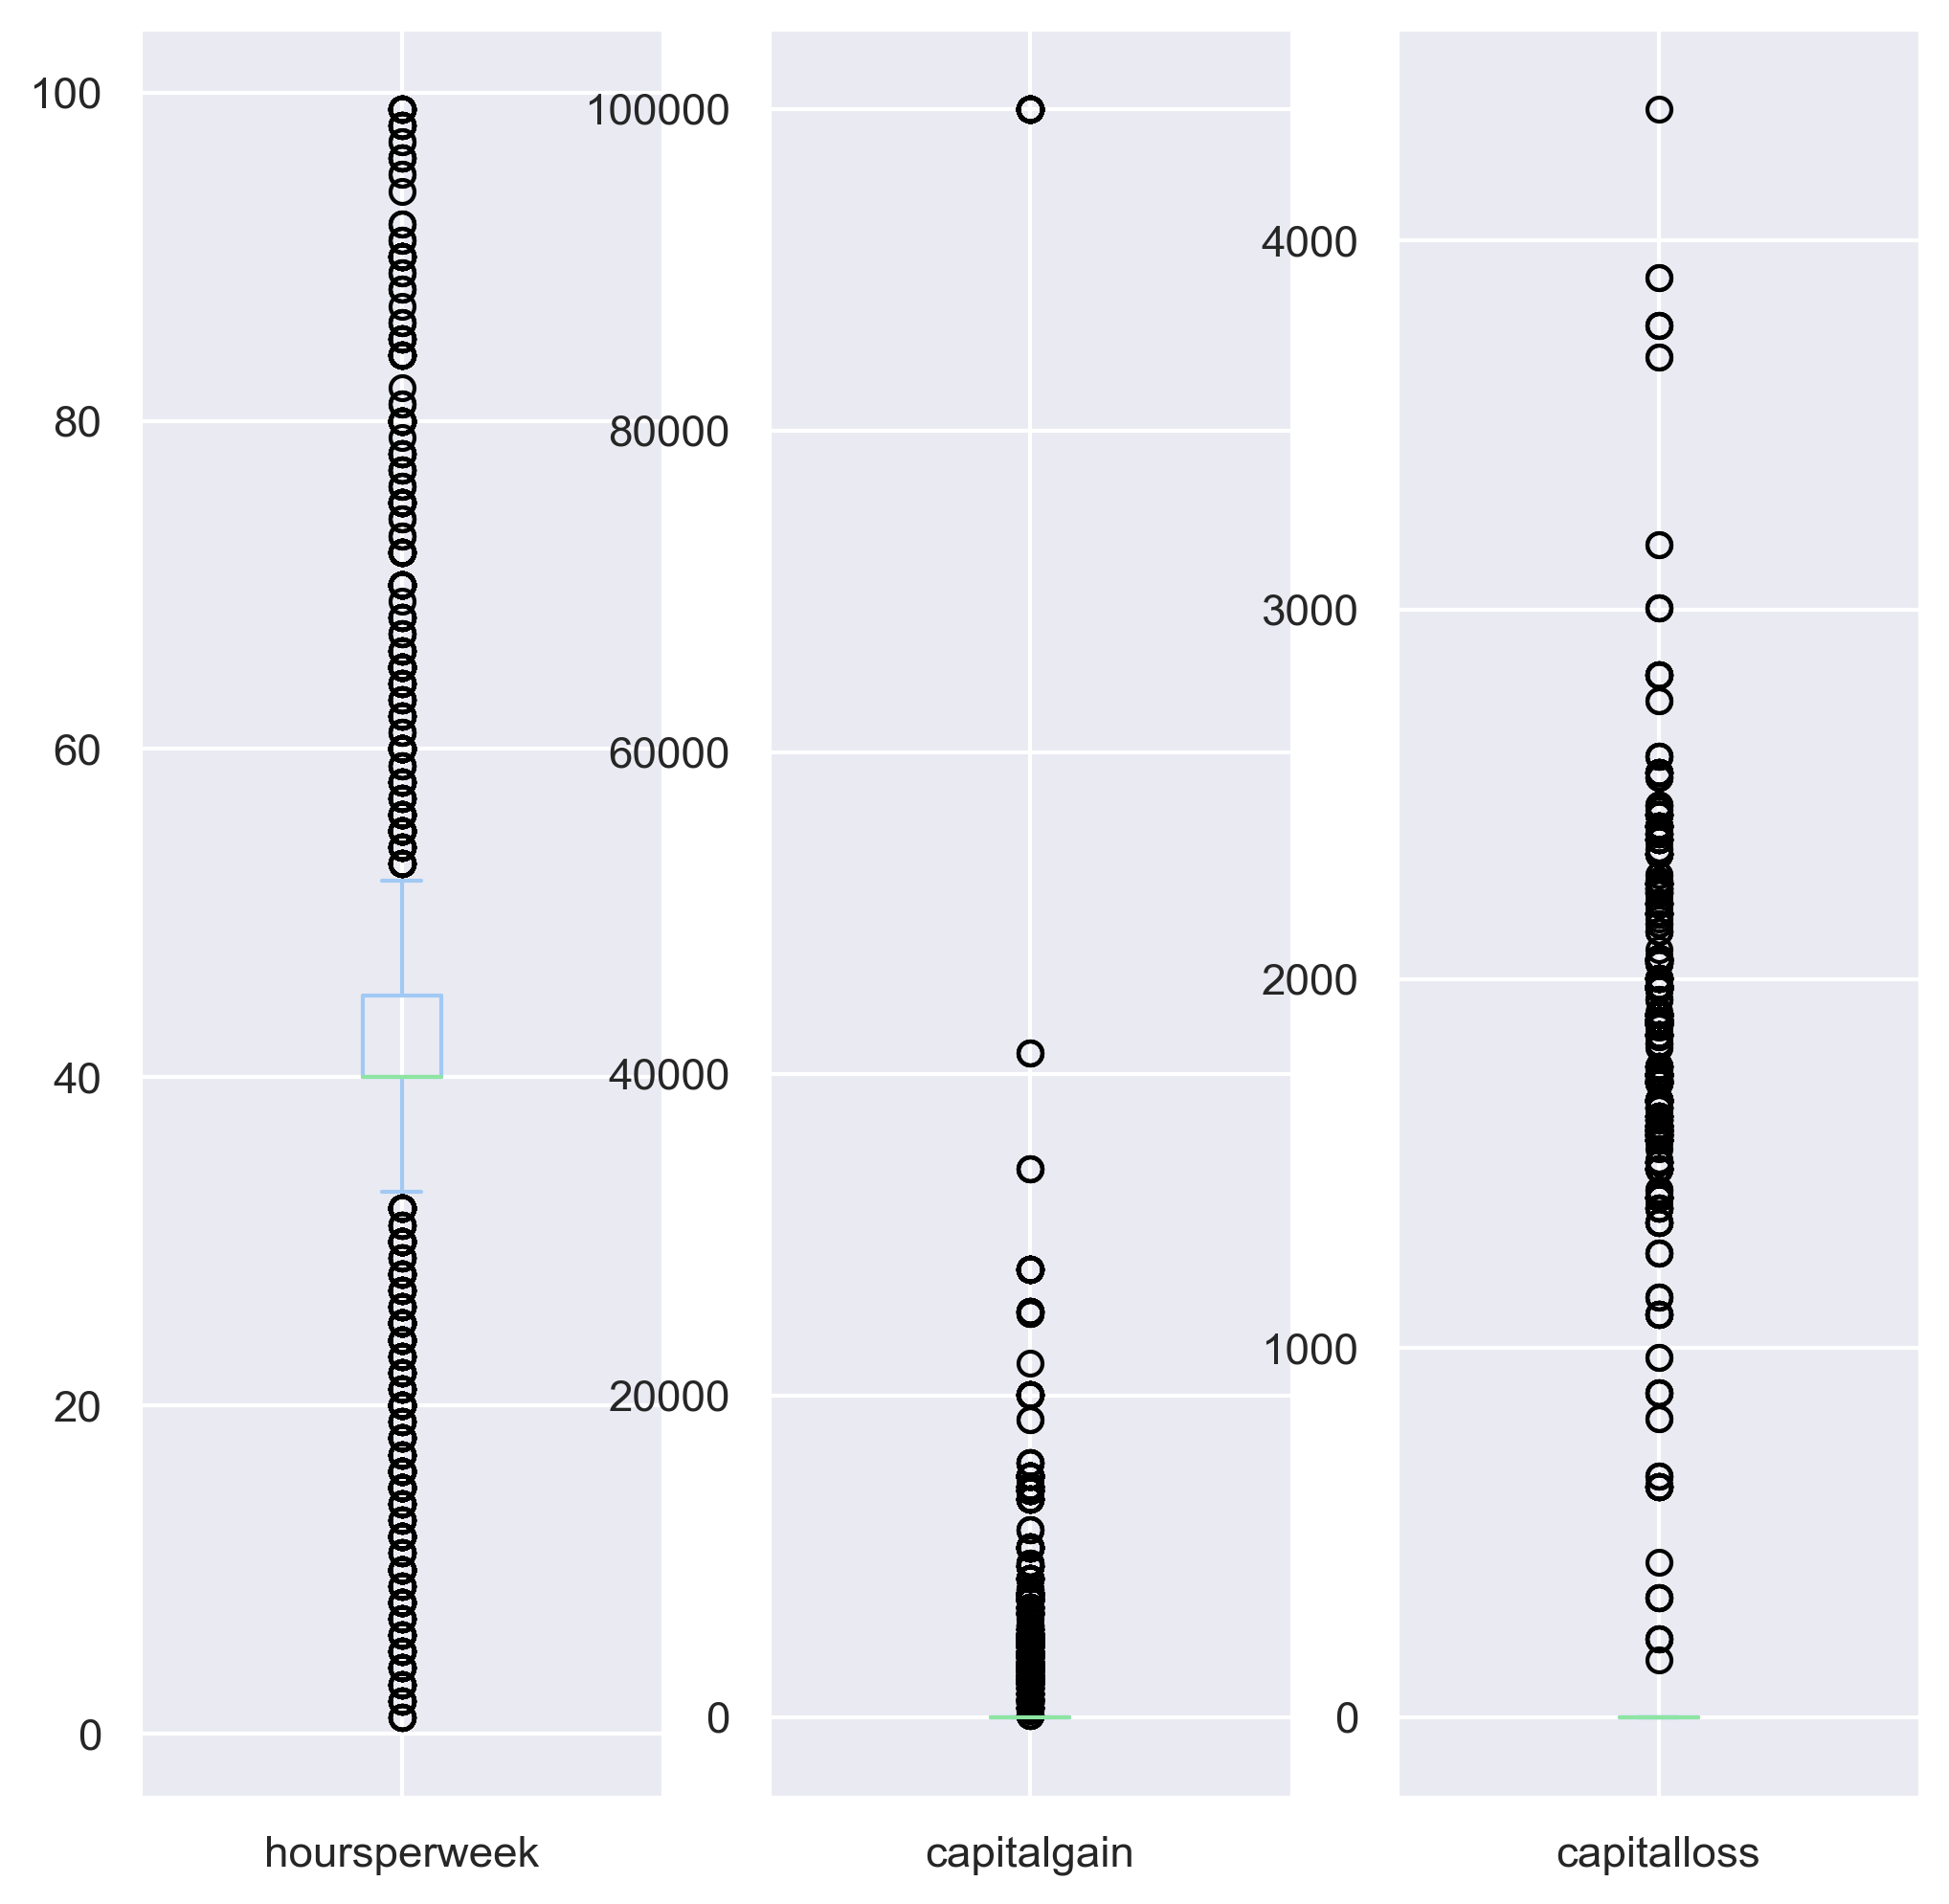

In [14]:
df[['hoursperweek','capitalgain','capitalloss']].plot(kind = 'box', figsize = (8,8), subplots = True)

<Axes: ylabel='Salary'>

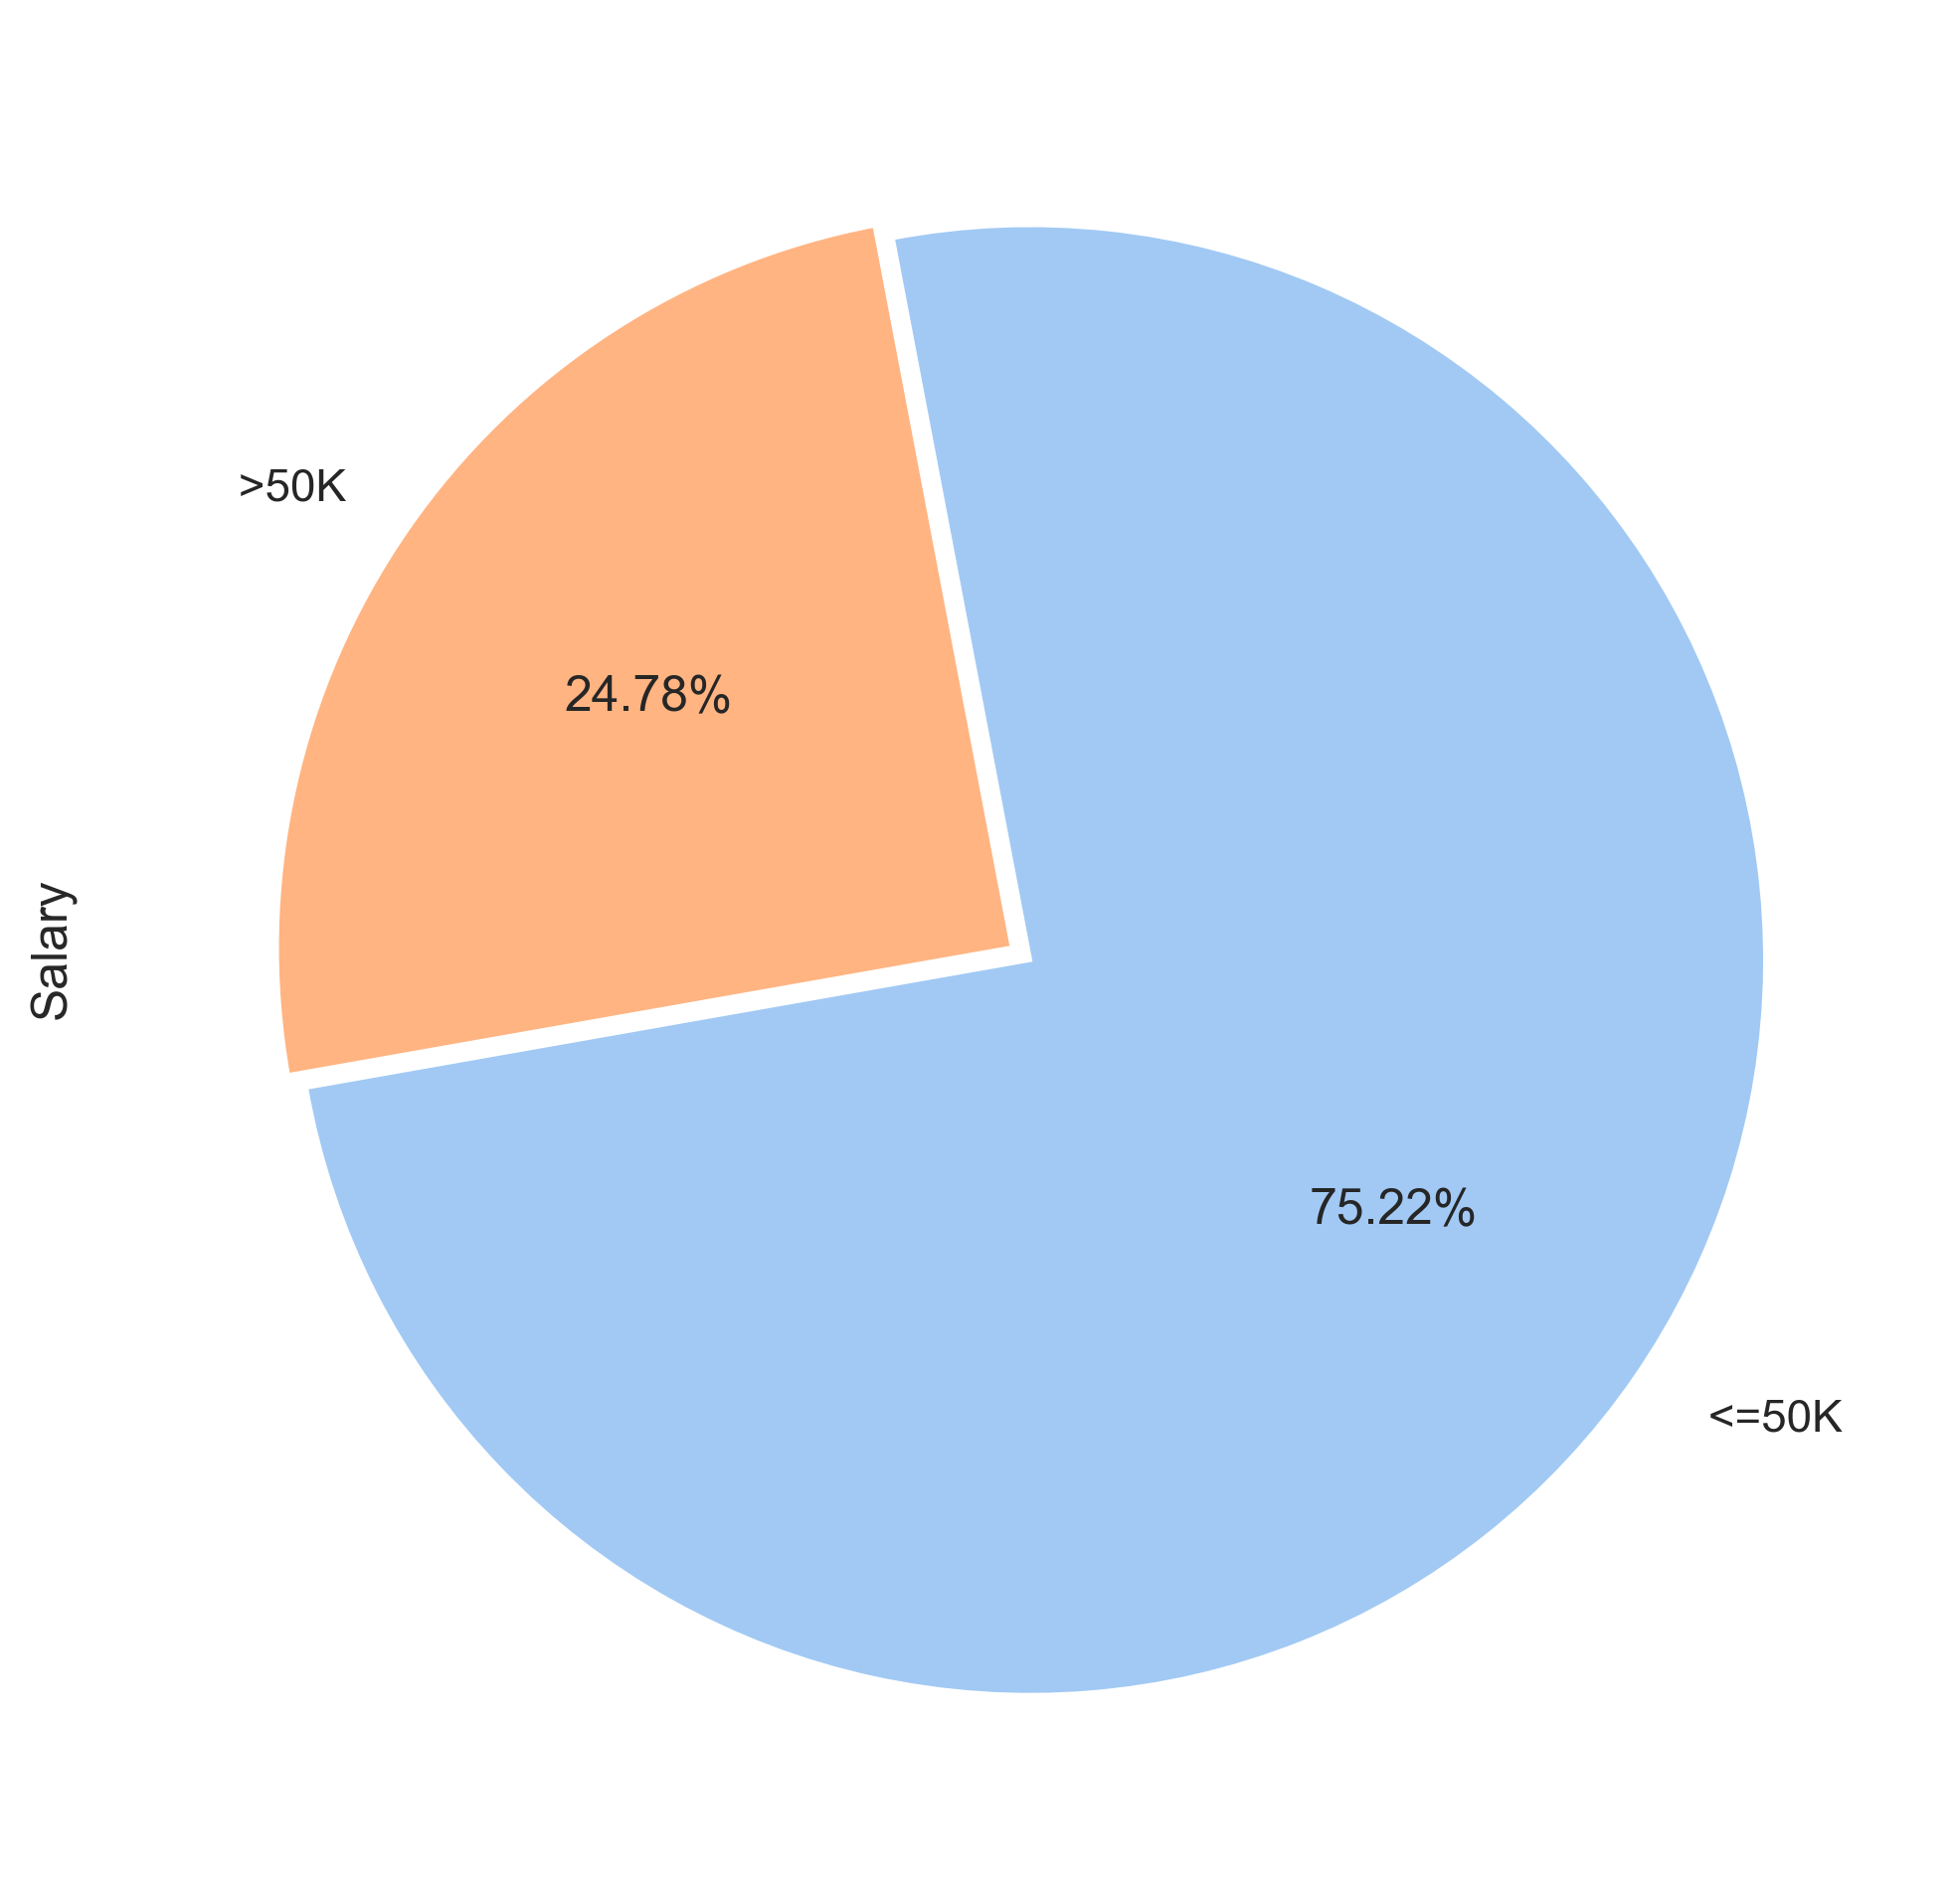

In [15]:
df['Salary'].value_counts().plot(kind= 'pie', autopct= '%0.2f%%', explode= [0.03,0.0],startangle= 190)

> * #### From heatmap we can observe non of the numerical variables are highly correlated.
> * #### Majority of data belong to age 20 to 40.
> * #### People working in private are in hugh number.
> * #### Male category have high percentage than females.
> * #### We can observe lot of outliers in numerical variables.
> * #### Majority of people (75%) have less than 50k salary.

___

* ### <font color = 'blue'> <u> DATA PREPROCESSING  </u>

### <font color = "green">➡ Lable Encoding 
* Majority of variables are of object data type so we encode them into numerical data type using LabelEncoder.

In [16]:
df = df.apply(LabelEncoder().fit_transform)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            45221 non-null  int64
 1   workclass      45221 non-null  int32
 2   education      45221 non-null  int32
 3   educationno    45221 non-null  int64
 4   maritalstatus  45221 non-null  int32
 5   occupation     45221 non-null  int32
 6   relationship   45221 non-null  int32
 7   race           45221 non-null  int32
 8   sex            45221 non-null  int32
 9   capitalgain    45221 non-null  int64
 10  capitalloss    45221 non-null  int64
 11  hoursperweek   45221 non-null  int64
 12  native         45221 non-null  int32
 13  Salary         45221 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 3.3 MB


### <font color = "green">➡ Train Test Split 

In [17]:
x = df.iloc[:,:13]
y = df['Salary']

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.3, random_state= 42)

In [19]:
print("Shape of x_train: ",xtrain.shape)
print("Shape of x_test: ", xtest.shape)
print("Shape of y_train: ",ytrain.shape)
print("Shape of y_test",ytest.shape)

Shape of x_train:  (31654, 13)
Shape of x_test:  (13567, 13)
Shape of y_train:  (31654,)
Shape of y_test (13567,)


___

* ### <font color = 'blue'> <u> MODEL BUILDING & EVALUATION</u>

In [20]:
 def fun(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(f'Tranning Score: {model.score(xtrain,ytrain)}')
    print(f'Testing Score:{model.score(xtest,ytest)}')
    print("_______________________________________________")
    print(f'Classification Report: \n {classification_report(ytest,ypred)}')
    print("_______________________________________________")
    print(f"Accuracy Score: {accuracy_score(ytest, ypred) * 100:.2f}%")
    print("_______________________________________________")
    print(f'Confusion Matrix: \n {confusion_matrix(ytest,ypred)}')
    print("_______________________________________________")
    sns.heatmap(confusion_matrix(ytest,ypred), annot=True)
    plt.xlabel('Predicted  Values')
    plt.ylabel('Actual Values')
   

### <font color = "green">➡ Multinomial Naive Bayes:

Tranning Score: 0.7791748278258672
Testing Score:0.7806442102159652
_______________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.93      0.87     10238
           1       0.60      0.31      0.41      3329

    accuracy                           0.78     13567
   macro avg       0.70      0.62      0.64     13567
weighted avg       0.76      0.78      0.75     13567

_______________________________________________
Accuracy Score: 78.06%
_______________________________________________
Confusion Matrix: 
 [[9564  674]
 [2302 1027]]
_______________________________________________


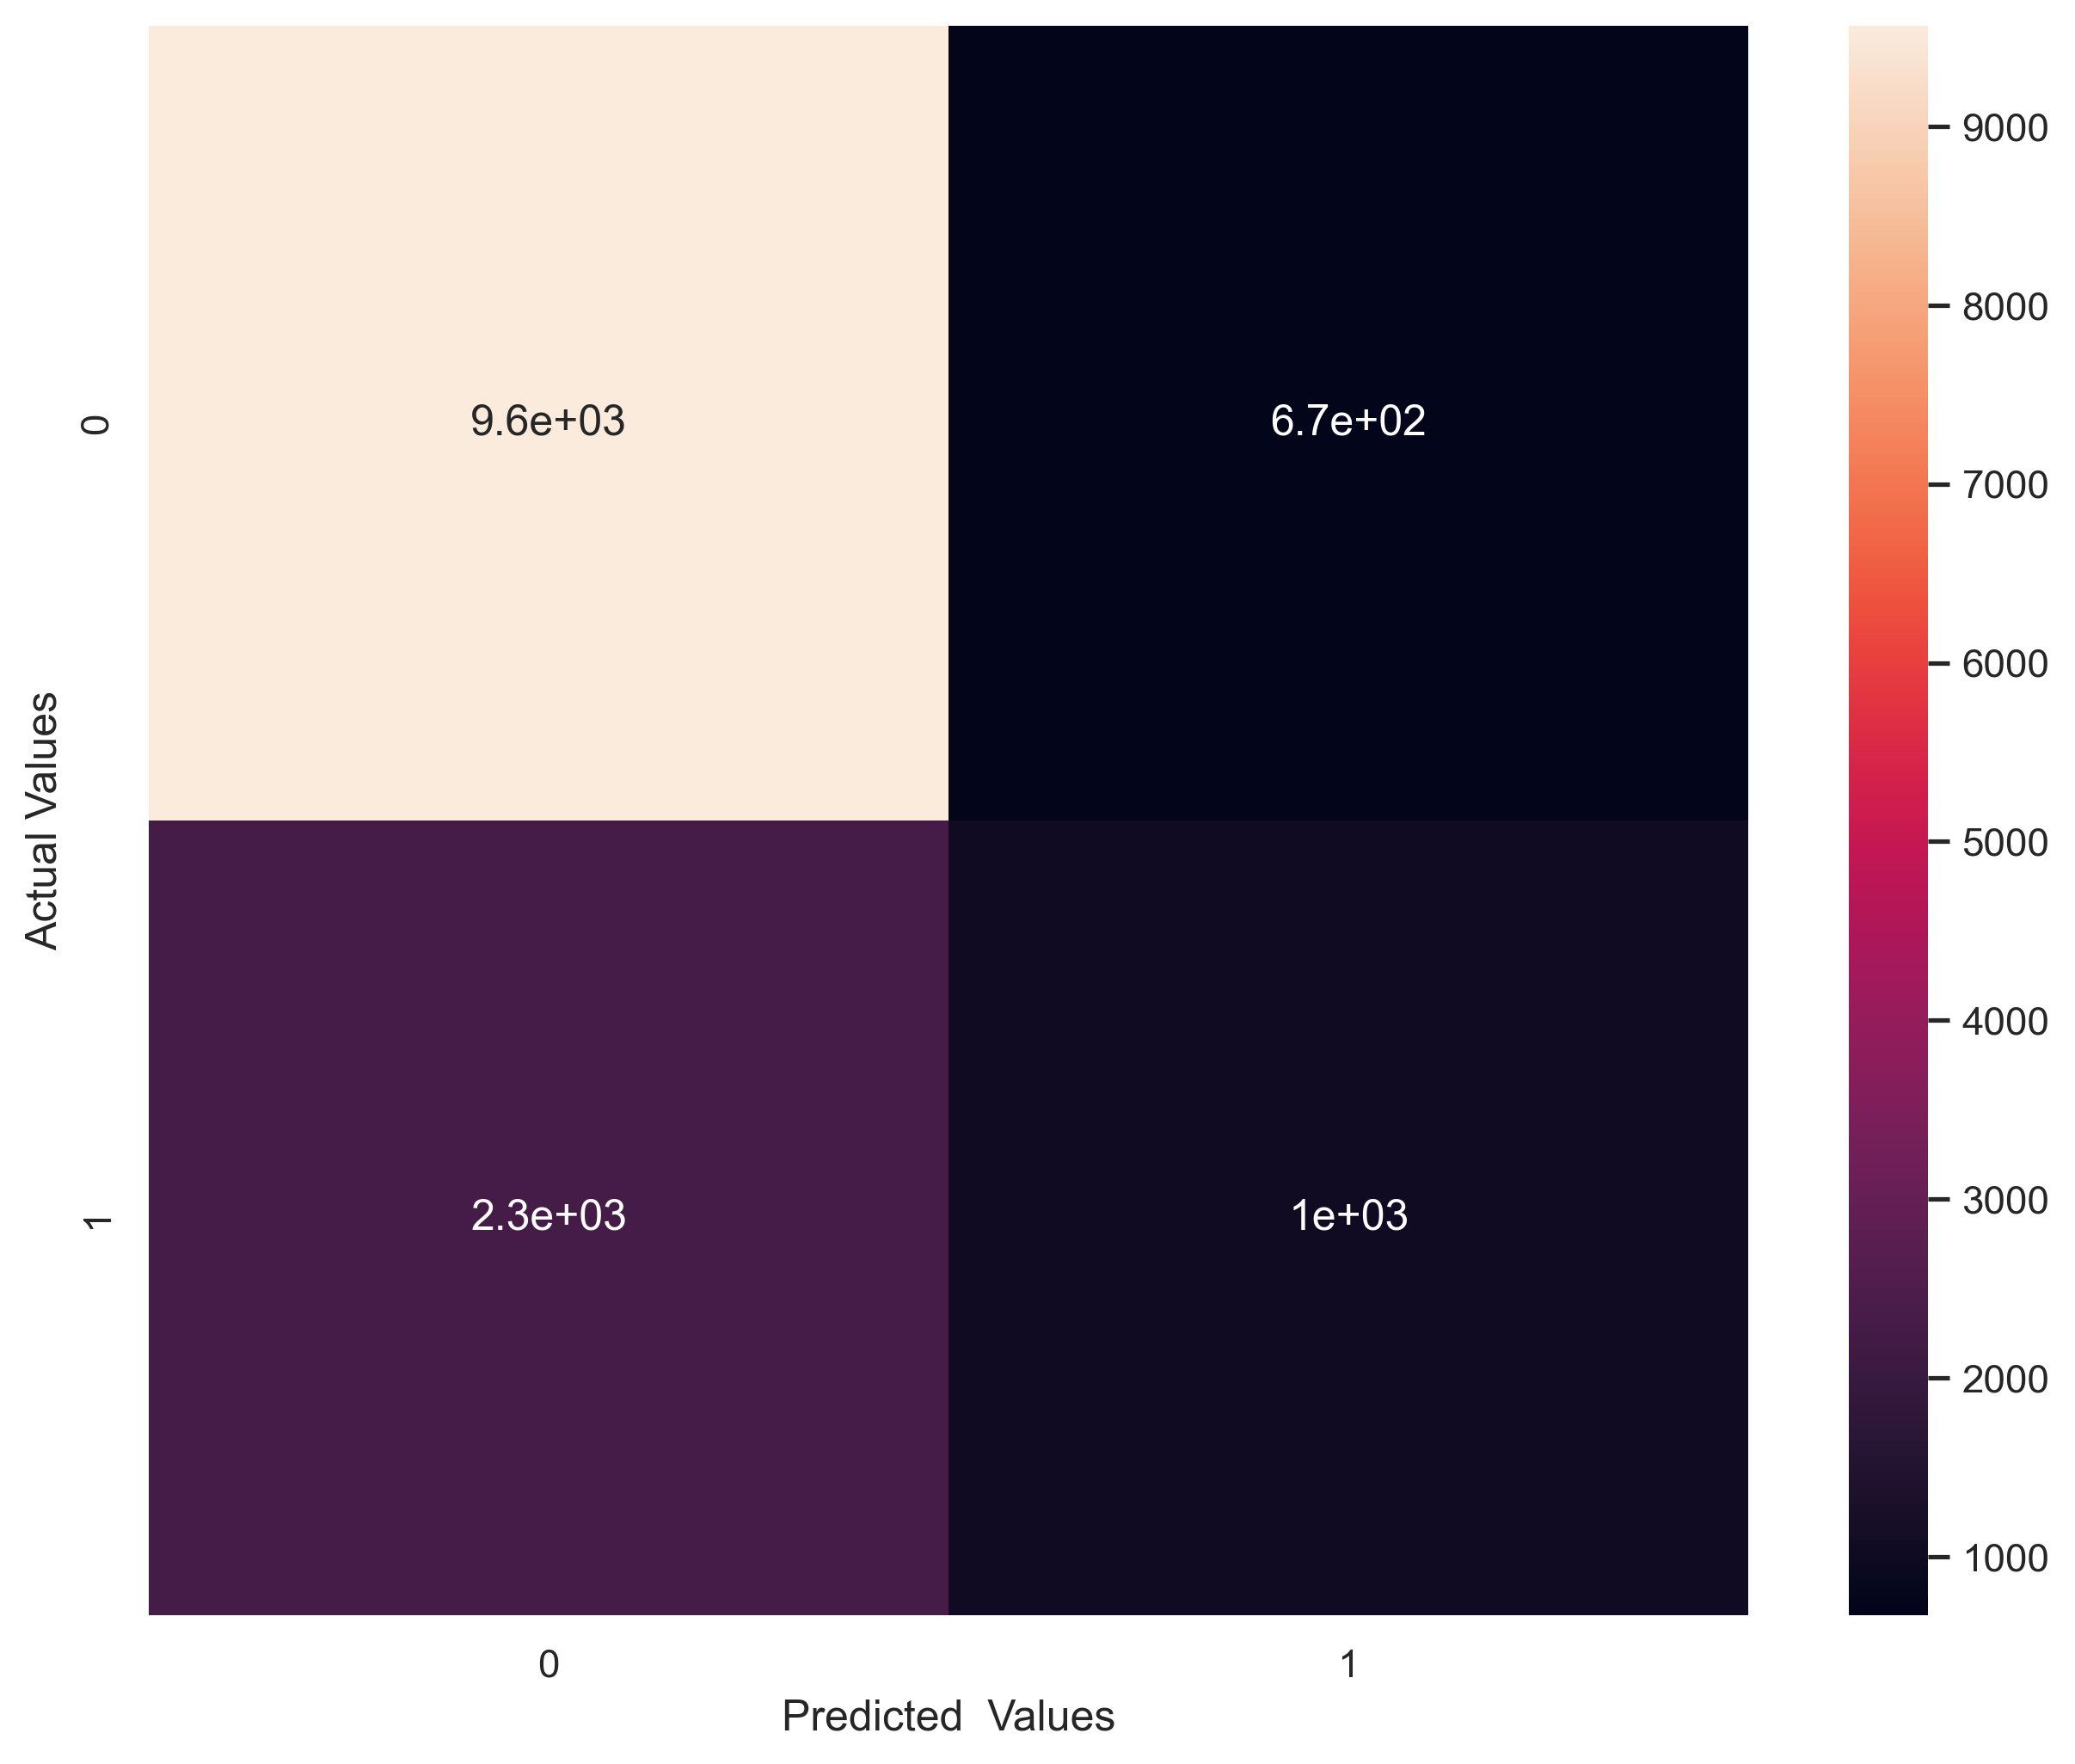

In [21]:
nb = MultinomialNB()
fun(nb)

### <font color = "green">➡ Gaussian Naive Bayes Classifier:

Tranning Score: 0.8103241296518607
Testing Score:0.8161715928355568
_______________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88     10238
           1       0.68      0.47      0.56      3329

    accuracy                           0.82     13567
   macro avg       0.76      0.70      0.72     13567
weighted avg       0.80      0.82      0.80     13567

_______________________________________________
Accuracy Score: 81.62%
_______________________________________________
Confusion Matrix: 
 [[9500  738]
 [1756 1573]]
_______________________________________________


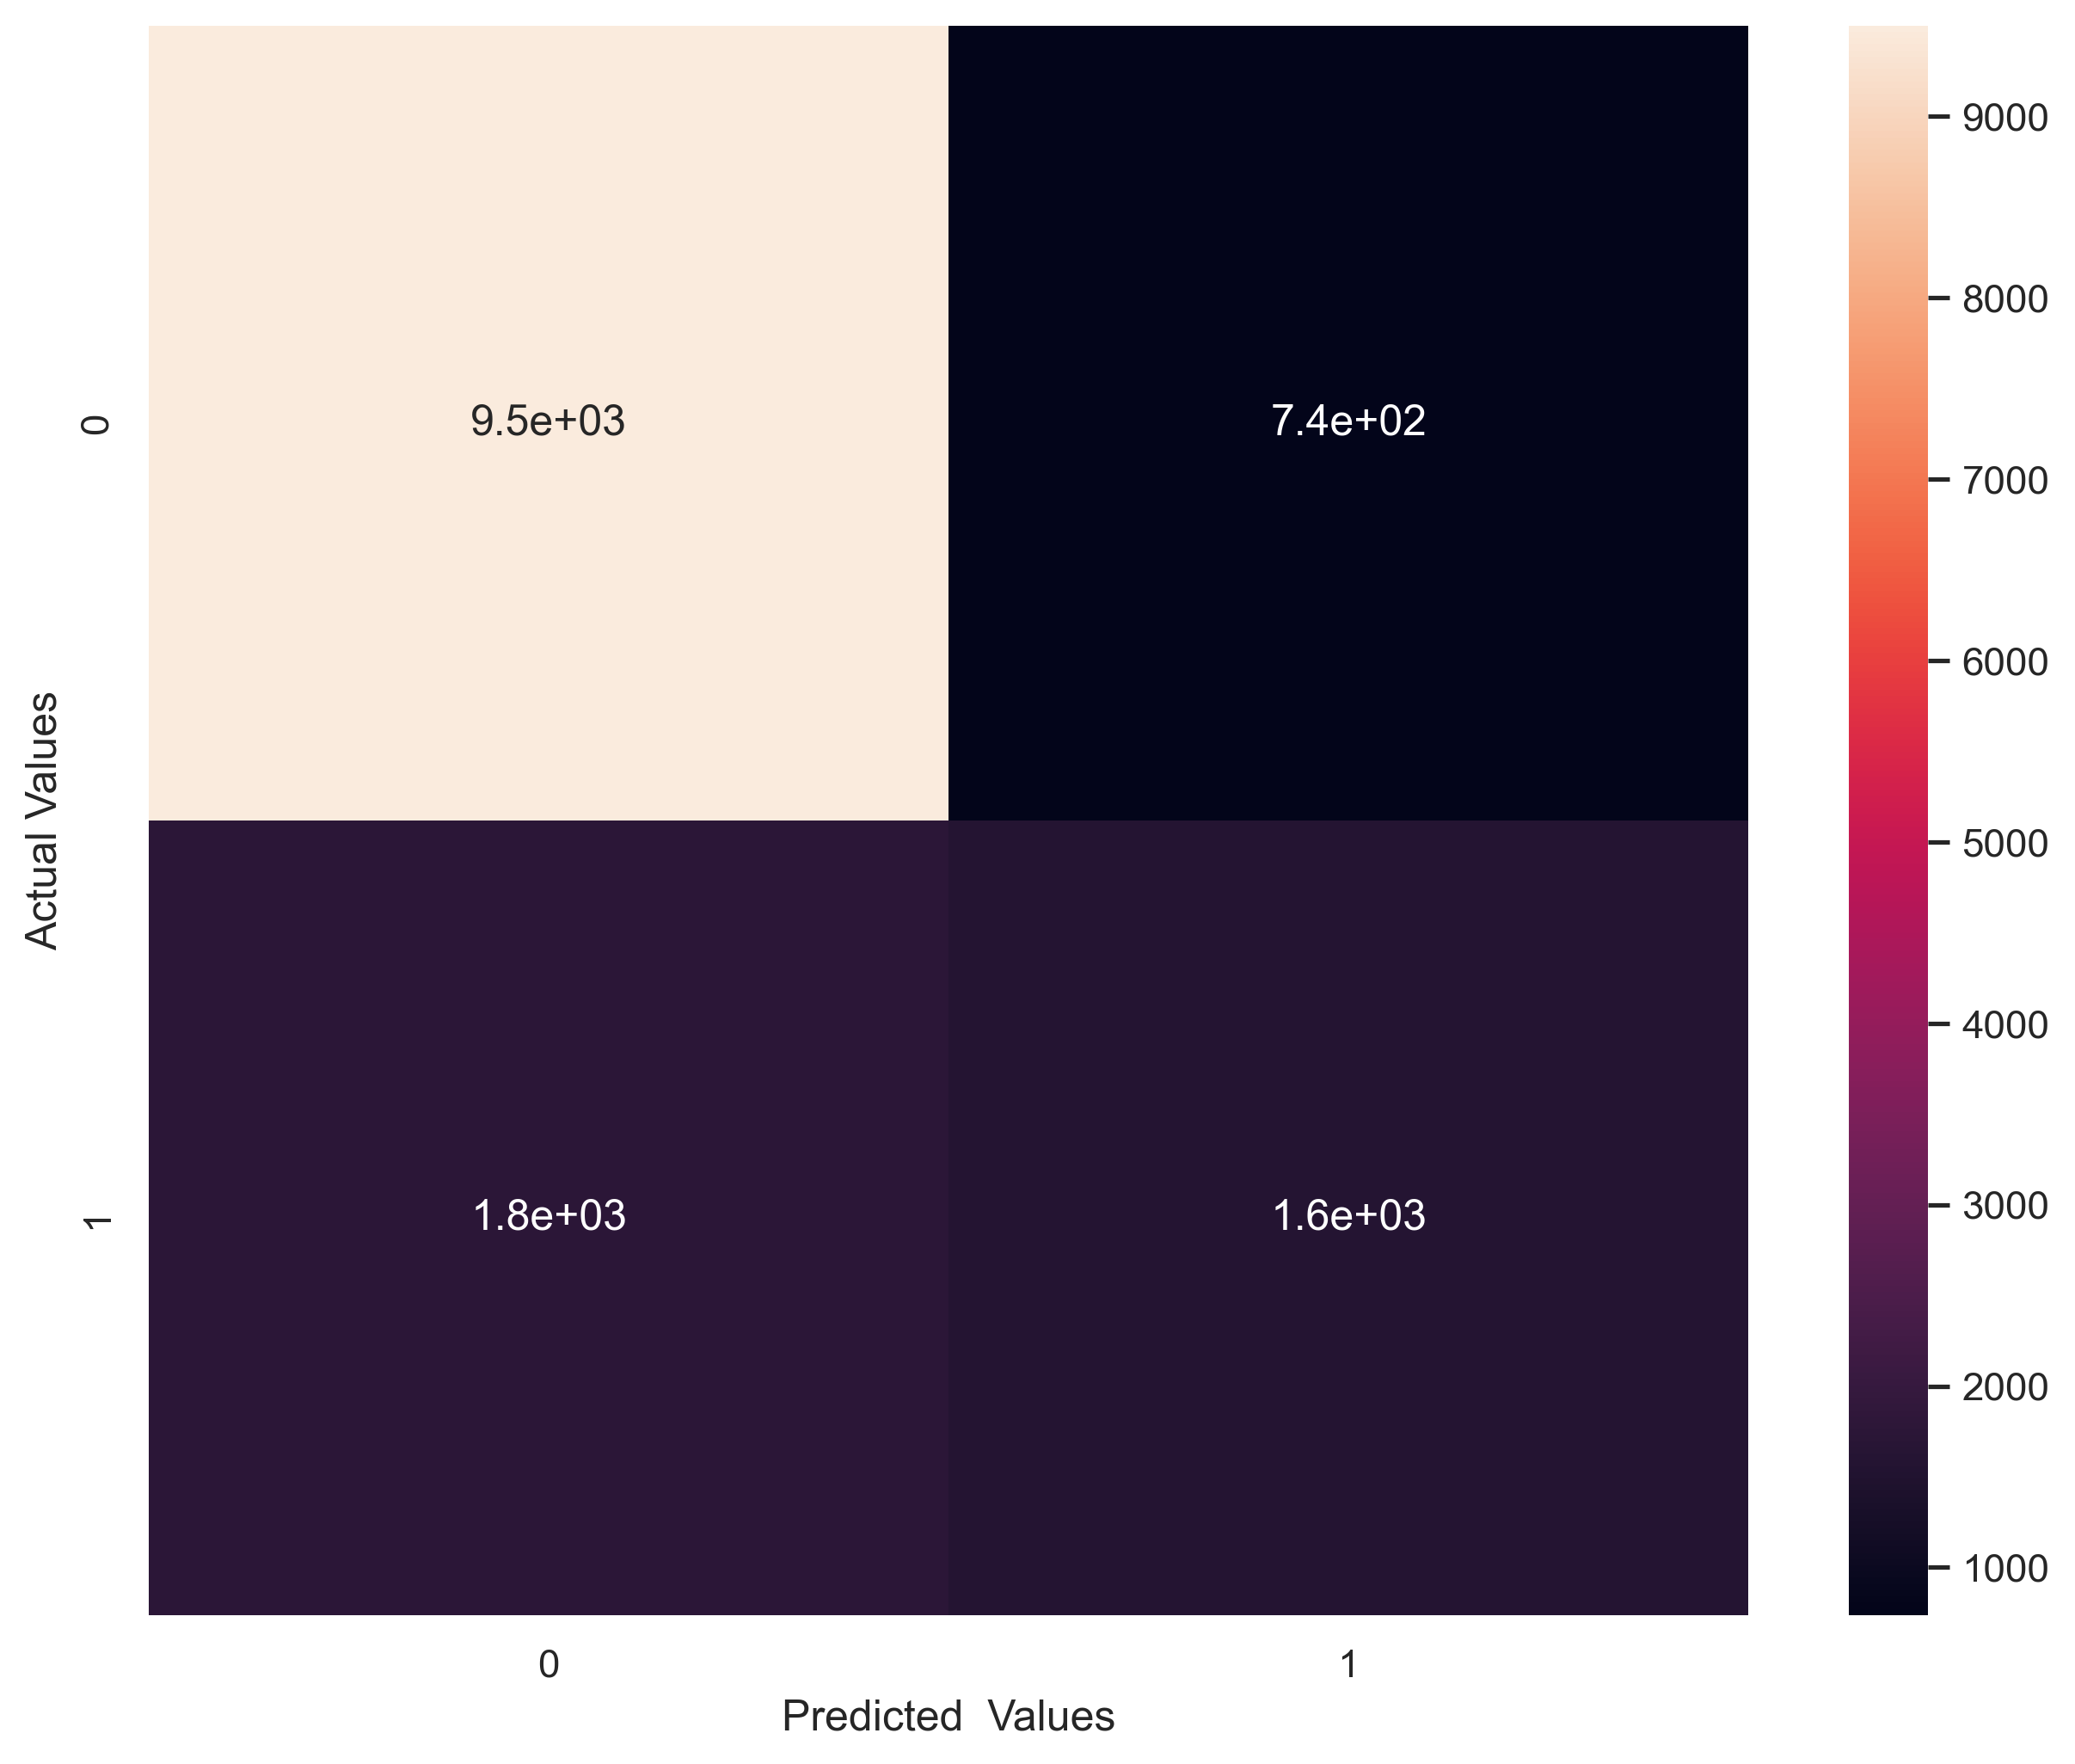

In [22]:
gb = GB()
fun(gb)

### <font color = "green">➡ Categorical Naive Bayes:

Tranning Score: 0.8357869463574904
Testing Score:0.840569027788015
_______________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.85      0.89     10238
           1       0.64      0.80      0.71      3329

    accuracy                           0.84     13567
   macro avg       0.78      0.83      0.80     13567
weighted avg       0.86      0.84      0.85     13567

_______________________________________________
Accuracy Score: 84.06%
_______________________________________________
Confusion Matrix: 
 [[8729 1509]
 [ 654 2675]]
_______________________________________________


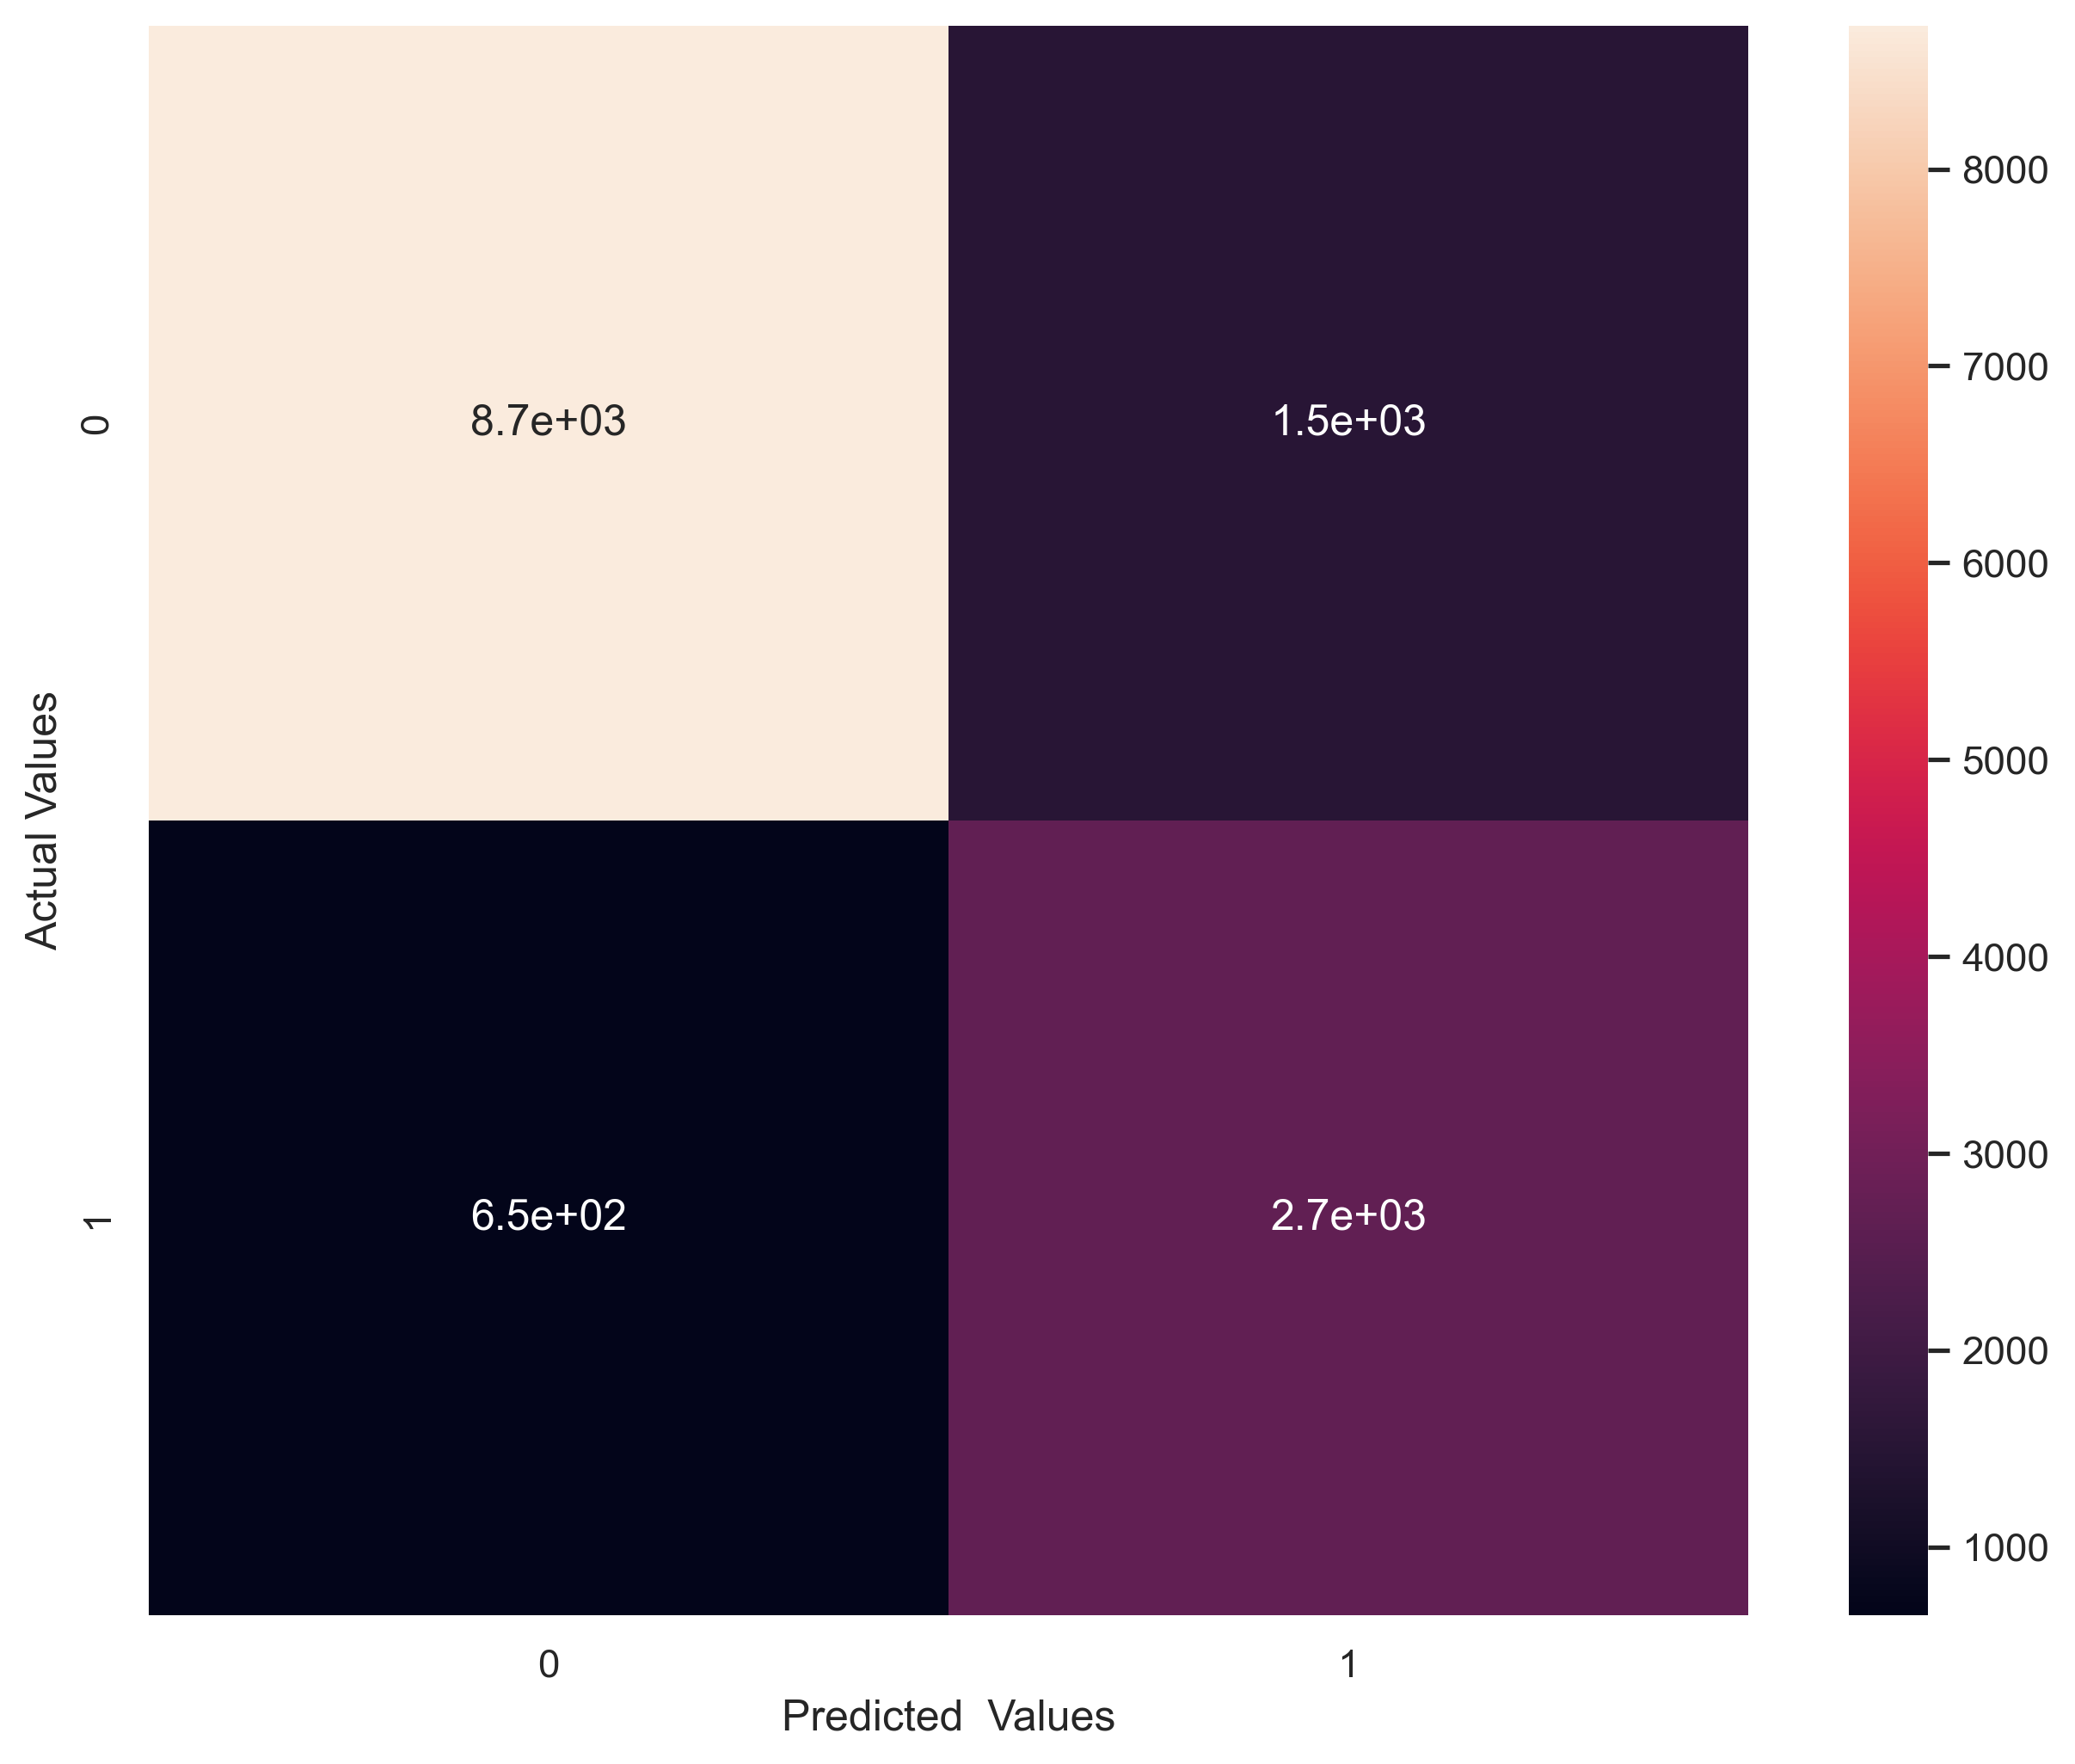

In [23]:
cnb = CNB()
fun(cnb)

* ### <font color = 'blue'> <u> CONCLUSION </u>
    - #### We got maximum accuracy(84%) for <font color ="candy"> Categorical Naive Bayes Classifier.</font>
    - #### As we can observe here Recall, Precision and f1-score values are high for zeroth class which is for "Salary less than 50k" than first class i.e. "Salary more than 50k", indicates that our results are biased towards the majority class.
    - #### This is due to imbalanced dataset, we know that 75% of data belong to "Salary less than 50k".
    - #### The model is correctly classifying all the majority classes yet fails to classify the minority classes.

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___